In [1]:
import heapq

class HuffmanNode:
    def __init__(self, weight, char=None):
        self.weight = weight  # 权重
        self.char = char      # 字符（叶子节点才有）
        self.left = None      # 左子节点
        self.right = None     # 右子节点

    # 用于堆排序的比较方法
    def __lt__(self, other):
        return self.weight < other.weight

def build_huffman_tree(frequencies):
    # 初始化优先队列（最小堆），每个字符作为单独节点
    heap = [HuffmanNode(w, c) for c, w in frequencies.items()]
    heapq.heapify(heap)

    # 合并节点直到只剩一棵树
    while len(heap) > 1:
        # 取出权重最小的两棵树
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        # 创建新父节点，权重为左右子树之和
        parent = HuffmanNode(left.weight + right.weight)
        parent.left = left
        parent.right = right
        # 将新树加入堆中
        heapq.heappush(heap, parent)
    return heap[0]  # 返回根节点

def generate_huffman_codes(root, code='', codes={}):
    if root is None:
        return
    if root.char is not None:
        codes[root.char] = code  # 记录叶子节点的编码
    generate_huffman_codes(root.left, code + '0', codes)  # 左子树路径加0
    generate_huffman_codes(root.right, code + '1', codes)  # 右子树路径加1
    return codes

# 示例用法
frequencies = {'A':5, 'B':29, 'C':7, 'D':8, 'E':14, 'F':23, 'G':3, 'H':11}
root = build_huffman_tree(frequencies)
huffman_codes = generate_huffman_codes(root)
print("哈夫曼编码：", huffman_codes)

哈夫曼编码： {'D': '000', 'H': '001', 'F': '01', 'B': '10', 'E': '110', 'C': '1110', 'G': '11110', 'A': '11111'}


/tmp/ipykernel_11206/2386317271.py:154: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_11206/2386317271.py:154: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_11206/2386317271.py:154: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_11206/2386317271.py:154: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_11206/2386317271.py:154: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_11206/2386317271.py:154: UserWarning: Glyph 21387 (\N{CJK UNIFIED IDEOGRAPH-538B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_11206/2386317271.py:154: UserWarning: Glyph 32553 (\N{CJK UNIFIED I

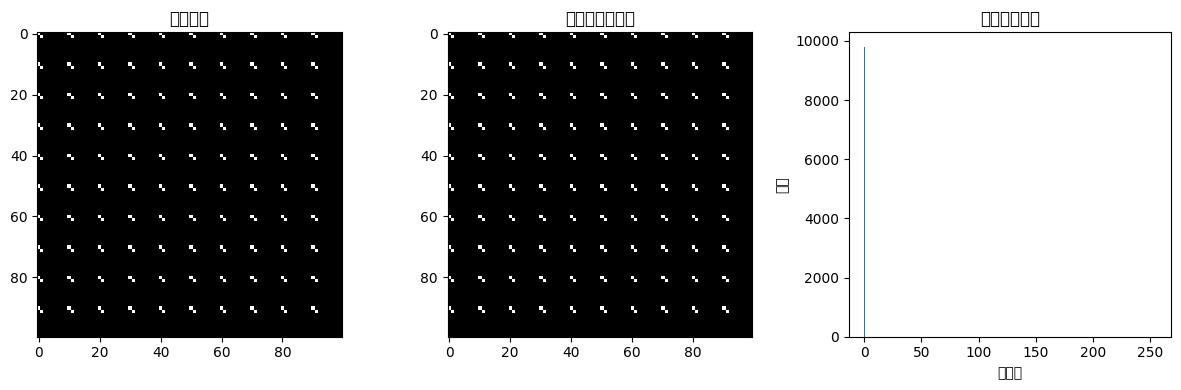

原始大小: 10000.0 字节
压缩后大小: 1250.0 字节
压缩率: 87.50%


In [2]:
import numpy as np
import heapq
from collections import defaultdict
import matplotlib.pyplot as plt
from PIL import Image
import os

class HuffmanNode:
    def __init__(self, pixel, freq):
        self.pixel = pixel  # 像素值
        self.freq = freq    # 频率
        self.left = None
        self.right = None
    
    def __lt__(self, other):
        return self.freq < other.freq

def build_frequency_dict(image_data):
    """构建像素频率字典"""
    freq_dict = defaultdict(int)
    for row in image_data:
        for pixel in row:
            freq_dict[pixel] += 1
    return freq_dict

def build_huffman_tree(freq_dict):
    """构建哈夫曼树"""
    heap = []
    for pixel, freq in freq_dict.items():
        node = HuffmanNode(pixel, freq)
        heapq.heappush(heap, node)
    
    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = HuffmanNode(None, left.freq + right.freq)
        merged.left = left
        merged.right = right
        heapq.heappush(heap, merged)
    
    return heap[0]

def build_code_table(root):
    """构建哈夫曼编码表"""
    code_table = {}
    
    def traverse(node, code=''):
        if node.pixel is not None:
            code_table[node.pixel] = code
            return
        traverse(node.left, code + '0')
        traverse(node.right, code + '1')
    
    traverse(root)
    return code_table

def compress_image(image_data, code_table):
    """压缩图像数据"""
    compressed_bits = ''
    for row in image_data:
        for pixel in row:
            compressed_bits += code_table[pixel]
    
    # 计算填充位数，使压缩后的数据长度为8的倍数
    padding = 8 - len(compressed_bits) % 8 if len(compressed_bits) % 8 != 0 else 0
    compressed_bits += '0' * padding  # 添加填充位
    
    # 转换为字节
    compressed_bytes = bytearray()
    for i in range(0, len(compressed_bits), 8):
        byte = compressed_bits[i:i+8]
        compressed_bytes.append(int(byte, 2))
    
    return compressed_bytes, padding

def decompress_image(compressed_bytes, padding, root, original_shape):
    """解压缩图像数据"""
    compressed_bits = ''.join([f"{byte:08b}" for byte in compressed_bytes])
    # 移除填充位
    compressed_bits = compressed_bits[:len(compressed_bits) - padding]
    
    decompressed_data = []
    current_node = root
    
    for bit in compressed_bits:
        if bit == '0':
            current_node = current_node.left
        else:
            current_node = current_node.right
        
        if current_node.pixel is not None:
            decompressed_data.append(current_node.pixel)
            current_node = root
    
    # 重塑为原始图像形状
    return np.array(decompressed_data).reshape(original_shape)

def calculate_compression_ratio(original_size, compressed_size):
    """计算压缩率"""
    return (1 - compressed_size / original_size) * 100

# 示例：使用 Lena 图像进行压缩
def main():
    # 加载示例图像（如果没有则创建一个简单的测试图像）
    try:
        img = Image.open('lena.jpg').convert('L')  # 转为灰度图
        image_data = np.array(img)
    except FileNotFoundError:
        # 创建测试图像：黑白棋盘格
        image_data = np.zeros((100, 100), dtype=np.uint8)
        image_data[::10, ::10] = 255
        image_data[1::10, 1::10] = 255
        # ... 更多棋盘格模式
        img = Image.fromarray(image_data)
    
    # 显示原始图像
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    plt.title('原始图像')
    plt.imshow(img, cmap='gray')
    
    # 构建频率字典
    freq_dict = build_frequency_dict(image_data)
    
    # 构建哈夫曼树
    root = build_huffman_tree(freq_dict)
    
    # 构建编码表
    code_table = build_code_table(root)
    
    # 压缩图像
    compressed_bytes, padding = compress_image(image_data, code_table)
    
    # 计算压缩率
    original_size = image_data.size * 8  # 以比特为单位
    compressed_size = len(compressed_bytes) * 8
    compression_ratio = calculate_compression_ratio(original_size, compressed_size)
    
    # 解压缩图像
    decompressed_data = decompress_image(compressed_bytes, padding, root, image_data.shape)
    
    # 显示解压缩后的图像
    plt.subplot(132)
    plt.title('解压缩后的图像')
    plt.imshow(Image.fromarray(decompressed_data), cmap='gray')
    
    # 显示频率分布
    plt.subplot(133)
    plt.title('像素频率分布')
    plt.bar(freq_dict.keys(), freq_dict.values())
    plt.xlabel('像素值')
    plt.ylabel('频率')
    
    plt.tight_layout()
    plt.show()
    
    print(f"原始大小: {original_size/8} 字节")
    print(f"压缩后大小: {compressed_size/8} 字节")
    print(f"压缩率: {compression_ratio:.2f}%")

if __name__ == "__main__":
    main()

原始大小: 7990272.0 字节
压缩后大小: 7274298.0 字节
压缩率: 8.96%


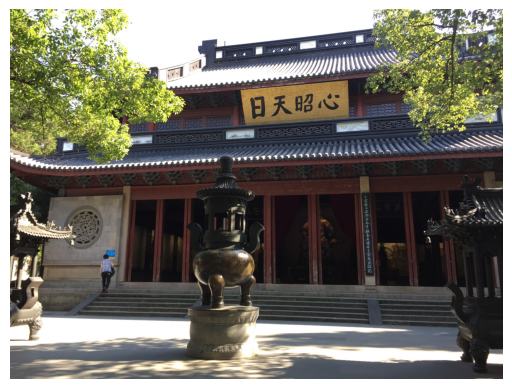

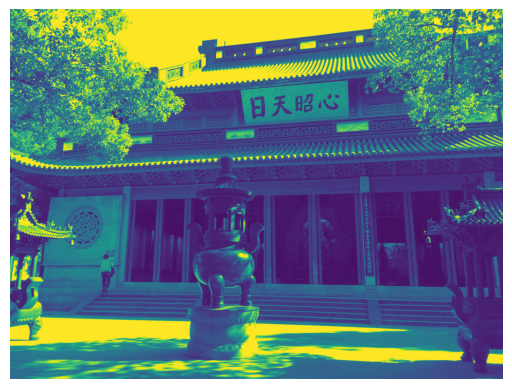

In [11]:
# 使用示例

# 1. 加载图像
from PIL import Image
import numpy as np

# 打开图像并转换为灰度图
image = 'IMG_0622.JPG'
image1 = Image.open('IMG_0622.JPG').convert('L')
image_data = np.array(image1)

# 2. 构建频率字典
freq_dict = build_frequency_dict(image_data)

# 3. 构建哈夫曼树
root = build_huffman_tree(freq_dict)

# 4. 生成编码表
code_table = build_code_table(root)

# 5. 压缩图像
compressed_bytes, padding = compress_image(image_data, code_table)

# 6. 解压缩图像
decompressed_data = decompress_image(compressed_bytes, padding, root, image_data.shape)

# 7. 将解压缩后的数据转换回图像
decompressed_image = Image.fromarray(decompressed_data)

# 8. 计算压缩率
original_size = image_data.size * 8  # 以比特为单位
compressed_size = len(compressed_bytes) * 8
compression_ratio = calculate_compression_ratio(original_size, compressed_size)

print(f"原始大小: {original_size/8} 字节")
print(f"压缩后大小: {compressed_size/8} 字节")
print(f"压缩率: {compression_ratio:.2f}%")

# 9. 保存并显示压缩前后图像
# 用Pillow打开图片
img = Image.open(image)

# 显示图片（使用matplotlib）
plt.imshow(img)
plt.axis('off')  # 关闭坐标轴
plt.show()
decompressed_image.save('decompressed_image.jpeg')
#decompressed_image.show()
img2 = Image.open('decompressed_image.jpeg')

# 显示图片（使用matplotlib）
plt.imshow(img2)
plt.axis('off')  # 关闭坐标轴
plt.show()

#显示像素频率图